In [1]:
# ! pip install absl-py
# ! pip install --upgrade google-api-python-client
# ! pip install gast
# ! pip install opt-einsum
# ! pip install astunparse
# ! pip install termcolor
# ! pip install --upgrade tensorflow

# import pkg_resources
# from subprocess import call
# packages = [dist.project_name for dist in pkg_resources.working_set]
# call("pip install --upgrade " + ' '.join(packages), shell=True)

# 모델 훈련 조기 종료(Early/Stopping)

    * MNIST&데이터 로드 후 정규화(Normalization)
    

In [2]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#2: normalize images
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255.0 # [0, 1] 
x_test /= 255.0


    * 레이블을 모두 원 핫 인코딩 벡터(One-hot encoding vector)로 변환

In [3]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

    * 완전연결층(Dense+layer) 사용해서 다층 퍼셉트론(MLP) 모델 구축하기

In [4]:

#4: x_train.shape = (60000, 28, 28) 
model = tf.keras. Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) 
model.add(tf.keras.layers.Dense (units=5, activation='sigmoid')) 
model.add(tf.keras.layers.Dense (units=10, activation='softmax')) 
model.summary() # ← 이 코드를 사용하면 모델 구축 결과를 요약해서 볼 수 있다.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01) # ← Setting model optimizer as RMSprop 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    * 콜백 설정: 특정 조건에서 모델 조기 종료 설정

In [6]:
#5
callback = tf.keras.callbacks. EarlyStopping (monitor= 'val_loss', 
                                              min_delta = 0.001, #최소 갱신 값 
                                              patience=10, #위반 허용 횟수
                                              verbose=1, # Callback 메시지 출력
                                              mode = 'auto') # 'min', 'max', 'auto'

#6
# 
ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
                validation_split =0.2, verbose=2, callbacks = [callback])

Epoch 1/100
240/240 - 1s - loss: 1.0800 - accuracy: 0.7356 - val_loss: 0.6295 - val_accuracy: 0.8528 - 1s/epoch - 4ms/step
Epoch 2/100
240/240 - 0s - loss: 0.5593 - accuracy: 0.8514 - val_loss: 0.4983 - val_accuracy: 0.8609 - 396ms/epoch - 2ms/step
Epoch 3/100
240/240 - 0s - loss: 0.4937 - accuracy: 0.8606 - val_loss: 0.4975 - val_accuracy: 0.8596 - 389ms/epoch - 2ms/step
Epoch 4/100
240/240 - 0s - loss: 0.4737 - accuracy: 0.8654 - val_loss: 0.4649 - val_accuracy: 0.8674 - 387ms/epoch - 2ms/step
Epoch 5/100
240/240 - 0s - loss: 0.4624 - accuracy: 0.8683 - val_loss: 0.4584 - val_accuracy: 0.8672 - 402ms/epoch - 2ms/step
Epoch 6/100
240/240 - 0s - loss: 0.4582 - accuracy: 0.8679 - val_loss: 0.4638 - val_accuracy: 0.8655 - 399ms/epoch - 2ms/step
Epoch 7/100
240/240 - 0s - loss: 0.4536 - accuracy: 0.8699 - val_loss: 0.4648 - val_accuracy: 0.8648 - 399ms/epoch - 2ms/step
Epoch 8/100
240/240 - 0s - loss: 0.4495 - accuracy: 0.8722 - val_loss: 0.4445 - val_accuracy: 0.8712 - 384ms/epoch - 2ms/

KeyboardInterrupt: 

    * 모델 학습 스케쥴러 정의하기

In [ ]:
def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch:
        return 0.5 * lr
    return lr

callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

# 여기서 만든 Schedular() 함수는 2 에폭 간격으로 학습률을  0.1*learning rate로 감소시킨다.변화된 학습률은 다음 에폭에 반영된다.
# LearningRateSchedular(scheduler, verbose=1) 로 LearningRateSchedular 의 callback을 생성한다.

    * 정의한 모델 학습 스케쥴러에 따라 모델 훈련시키기

In [ ]:
#6
# 
ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
                validation_split =0.2, verbose=2, callbacks = [callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
240/240 - 1s - loss: 0.3610 - accuracy: 0.9004 - val_loss: 0.3978 - val_accuracy: 0.8885 - lr: 0.0100 - 675ms/epoch - 3ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/100
240/240 - 1s - loss: 0.3629 - accuracy: 0.8999 - val_loss: 0.4153 - val_accuracy: 0.8842 - lr: 0.0100 - 526ms/epoch - 2ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/100
240/240 - 1s - loss: 0.3606 - accuracy: 0.9005 - val_loss: 0.3998 - val_accuracy: 0.8894 - lr: 0.0100 - 530ms/epoch - 2ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/100
240/240 - 1s - loss: 0.3598 - accuracy: 0.9012 - val_loss: 0.4017 - val_accuracy: 0.8895 - lr: 0.0100 - 525ms/epoch - 2ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 5/100
240/240 - 1s - loss: 0.3591 - accurac

In [ ]:
! tensorboard --logdir C:/Users/nonel/tmp/log/3101

'tensorboard'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import os
path = "C:/Users/nonel/tmp/log/"
if not os.path.isdir(path):
    os.mkdir(path)
##logdir = path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
logdir = path + "3101"
##callback = tf.keras.callbacks. TensorBoard (log_dir=logdir)
callback = tf.keras.callbacks. TensorBoard (log_dir=logdir, update_freq='epoch', histogram_freq= 10, write_images=True)
#6
ret = model.fit(x_train, y_train, epochs=20, batch_size=200,
                validation_split =0.2, verbose=2, callbacks=[callback])

Epoch 1/20
240/240 - 1s - loss: 1.1355 - accuracy: 0.7225 - val_loss: 0.6769 - val_accuracy: 0.8332 - 1s/epoch - 5ms/step
Epoch 2/20
240/240 - 0s - loss: 0.6210 - accuracy: 0.8336 - val_loss: 0.5503 - val_accuracy: 0.8466 - 498ms/epoch - 2ms/step
Epoch 3/20
240/240 - 0s - loss: 0.5457 - accuracy: 0.8484 - val_loss: 0.5139 - val_accuracy: 0.8570 - 484ms/epoch - 2ms/step
Epoch 4/20
240/240 - 0s - loss: 0.5188 - accuracy: 0.8554 - val_loss: 0.4945 - val_accuracy: 0.8624 - 481ms/epoch - 2ms/step
Epoch 5/20
240/240 - 0s - loss: 0.5046 - accuracy: 0.8578 - val_loss: 0.5096 - val_accuracy: 0.8547 - 385ms/epoch - 2ms/step
Epoch 6/20
240/240 - 0s - loss: 0.4934 - accuracy: 0.8624 - val_loss: 0.4735 - val_accuracy: 0.8676 - 371ms/epoch - 2ms/step
Epoch 7/20
240/240 - 0s - loss: 0.4884 - accuracy: 0.8620 - val_loss: 0.4994 - val_accuracy: 0.8547 - 402ms/epoch - 2ms/step
Epoch 8/20
240/240 - 0s - loss: 0.4817 - accuracy: 0.8651 - val_loss: 0.4720 - val_accuracy: 0.8652 - 381ms/epoch - 2ms/step
Epo

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt 
import datetime
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#2: normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 # [0, 1]
x_test / 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical (y_train) # (60000, 10) 
y_test = tf.keras.utils.to_categorical (y_test) # (10000, 10)

#4: build a model
#4-1
# init = tf.keras.initializers.he_normal() # 'he_normal'
# act = tf.keras.activations.relu

#4-2
# 'relu'
init = tf.keras.initializers.he_normal() 
act = tf.keras.layers.LeakyReLU(alpha=0.3)

#4-3
# init = tf.keras.initializers.he_uniform() # 'he_uniform'
# act = tf.keras.layers.LeakyReLU(alpha=0.3)


In [2]:

n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=10, activation='softmax', kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers.RMSprop (learning_rate=0.01)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

c:\Users\nonel\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [3]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01) # ← Setting model optimizer as RMSprop 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# #5
# callback = tf.keras.callbacks. EarlyStopping (monitor= 'val_loss', 
#                                               min_delta = 0.001, #최소 갱신 값 
#                                               patience=10, #위반 허용 횟수
#                                               verbose=1, # Callback 메시지 출력
#                                               mode = 'auto') # 'min', 'max', 'auto'

# #6
# # 
# ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
#                 validation_split =0.2, verbose=2, callbacks = [callback])

In [6]:
#5: creates a summary file writer for the given log directory 
import os
path = "C:/Users/nonel/tmp/log/"
if not os.path.isdir(path):
    os.mkdir(path)
##logdir = path + datetime.datetime.now().strftime("%Y%m%d-%H%%S") 
logdir = path + "3203"
file_writer = tf.summary.create_file_writer (logdir + "/gradient") 
file_writer.set_as_default()

In [7]:
#6: calculate averages and histograms of gradients in layers 
class GradientCallback(tf.keras.callbacks.Callback):
##
##
    def __init__(self, freq=10):
        # super(GradientCallback, self).__init__() 
        self.freq = freq

    def on_epoch_end (self, epoch, logs):
        if epoch%self.freq != 0: 
            return
        with tf.GradientTape() as tape:
            y_pred = model (x_train) # tensor, logits
            loss = tf.keras. losses.binary_crossentropy(y_train, y_pred) 
        grads = tape.gradient(loss, model.trainable_weights)

        for n in range(1, len (model.layers)):
            i2 = (n-1)*2    # weights
            i1 = 12 + 1     # biases
            bias_avg = tf.reduce_mean(tf.abs(grads[i1])) 
            weight_avg = tf.reduce_mean(tf.abs(grads[12]))
            tf.summary.scalar ("layer_%d/avg/bias "%n, data=bias_avg, step=epoch) 
            tf.summary.scalar ("layer_%d/avg/weight" %n, data=weight_avg, step=epoch)
            tf.summary.histogram ("layer_%d/hist/bias" %n, data=grads [i1], step=epoch) 
            tf.summary.histogram ("layer_%d/hist/weight"%n, data=grads [12], step=epoch)

    def on_train_end(self, logs):
        tf.summary.flush()

In [7]:

callback1 = GradientCallback() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard (log_dir=logdir, histogram_freq= 10) #profile_batch=0

#7: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2, 
                verbose=2, callbacks = [callback1, callback2])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/101


240/240 - 4s - loss: 5.1989 - accuracy: 0.5918 - val_loss: 0.5597 - val_accuracy: 0.8407 - 4s/epoch - 17ms/step
Epoch 2/101
240/240 - 1s - loss: 2.0090 - accuracy: 0.7329 - val_loss: 1.6764 - val_accuracy: 0.5258 - 1s/epoch - 6ms/step
Epoch 3/101
240/240 - 1s - loss: 1.3189 - accuracy: 0.7813 - val_loss: 0.2928 - val_accuracy: 0.9212 - 1s/epoch - 6ms/step
Epoch 4/101
240/240 - 1s - loss: 0.6130 - accuracy: 0.8438 - val_loss: 0.8656 - val_accuracy: 0.8319 - 1s/epoch - 5ms/step
Epoch 5/101
240/240 - 1s - loss: 0.4225 - accuracy: 0.8902 - val_loss: 0.2232 - val_accuracy: 0.9417 - 1s/epoch - 5ms/step
Epoch 6/101
240/240 - 1s - loss: 0.4114 - accuracy: 0.8988 - val_loss: 0.2173 - val_accuracy: 0.9423 - 1s/epoch - 6ms/step
Epoch 7/101
240/240 - 1s - loss: 0.3177 - accuracy: 0.9170 - val_loss: 0.2587 - val_accuracy: 0.9346 - 1s/epoch - 6ms/step
Epoch 8/101
240/240 - 1s - loss: 0.2714 - accuracy: 0.9292 - val_loss: 0.3577 - val_accuracy: 0.9026 - 1s/epoch - 6ms/step
Epoch 9/101
240/240 - 1s - 

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt 
import datetime
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#2: normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 # [0, 1]
x_test / 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical (y_train) # (60000, 10) 
y_test = tf.keras.utils.to_categorical (y_test) # (10000, 10)

#4: build a model

init = tf.keras.initializers.RandomUniform(0.0, 1.0)
act = tf.keras.layers.LeakyReLU(alpha=0.3)


In [9]:

n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. BatchNormalization())
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers. Dense (units=10, activation='softmax', kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                      

In [10]:

callback1 = GradientCallback() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard (log_dir=logdir, histogram_freq= 10) #profile_batch=0

#7: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2, 
                verbose=2, callbacks = [callback1, callback2])

Epoch 1/101
240/240 - 4s - loss: 7.9480 - accuracy: 0.1976 - val_loss: 2.1611 - val_accuracy: 0.1913 - 4s/epoch - 15ms/step
Epoch 2/101
240/240 - 1s - loss: 1.9041 - accuracy: 0.2766 - val_loss: 1.7873 - val_accuracy: 0.2893 - 1s/epoch - 5ms/step
Epoch 3/101
240/240 - 1s - loss: 1.7780 - accuracy: 0.2919 - val_loss: 1.7409 - val_accuracy: 0.2271 - 1s/epoch - 5ms/step
Epoch 4/101
240/240 - 2s - loss: 1.7397 - accuracy: 0.2960 - val_loss: 1.6442 - val_accuracy: 0.2941 - 2s/epoch - 7ms/step
Epoch 5/101
240/240 - 2s - loss: 1.7100 - accuracy: 0.3076 - val_loss: 1.6357 - val_accuracy: 0.3261 - 2s/epoch - 8ms/step
Epoch 6/101
240/240 - 2s - loss: 1.6807 - accuracy: 0.3245 - val_loss: 1.6038 - val_accuracy: 0.3418 - 2s/epoch - 8ms/step
Epoch 7/101
240/240 - 2s - loss: 1.6370 - accuracy: 0.3437 - val_loss: 1.5378 - val_accuracy: 0.4041 - 2s/epoch - 7ms/step
Epoch 8/101
240/240 - 2s - loss: 1.5822 - accuracy: 0.3784 - val_loss: 1.5268 - val_accuracy: 0.3873 - 2s/epoch - 7ms/step
Epoch 9/101
240

In [11]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1875/1875 - 3s - loss: 0.0449 - accuracy: 0.9916 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 9217.6934 - accuracy: 0.3943 - 660ms/epoch - 2ms/step


In [ ]:
#######################################

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1875/1875 - 3s - loss: 2.1872e-05 - accuracy: 1.0000 - 3s/epoch - 2ms/step
313/313 - 0s - loss: 33.7337 - accuracy: 0.9782 - 456ms/epoch - 1ms/step


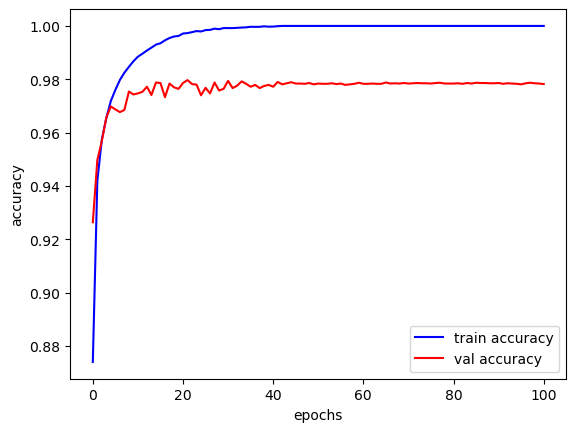

In [12]:
#4: build a model without regularization
act = "relu"
init = "he_uniform"
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model.add(tf.keras. layers. Dense (units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers. Dense (units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers.Dense (units=10, activation='softmax'))
model.summary()

#4-1: configure the model for training
opt = 'rmsprop' # tf.keras.optimizers.RMSprop (learning_rate=0.001) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

#4-3: plot accuracies
# plt.title("Without regularization by %s traing data in mnist"%n_sample)
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt. legend (loc="best") 
plt.show()

1875/1875 - 3s - loss: 0.1671 - accuracy: 0.9761 - 3s/epoch - 2ms/step
313/313 - 0s - loss: 25.8395 - accuracy: 0.8422 - 477ms/epoch - 2ms/step


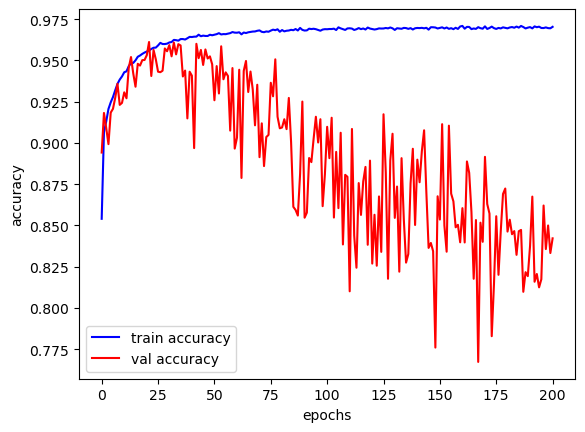

In [14]:

#5: build a model with weight regularization
reg= tf.keras.regularizers.l2(0.01) # L2: 0.01, 0.1, 0.5 
model2 = tf.keras. Sequential()
model2.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=10, activation='softmax'))

##model2.summary()
#5-1: configure the model for training
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#5-2: train and evaluate the model
ret2 = model2. fit (x_train, y_train, epochs=201, batch_size=400,
                    validation_data = (x_test, y_test), verbose=0) 

train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose=2) 
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
#5-3: plot accuracy
# plt.title("With regularization by %s traing data in mnist" %n_sample) 
plt.plot(ret2.history['accuracy'],"b-", label="train accuracy") 
plt.plot(ret2. history['val_accuracy'], "r-", label="val accuracy") 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend (loc="best")
plt.show()

1875/1875 - 5s - loss: 0.4889 - accuracy: 0.9071 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 48.6138 - accuracy: 0.6750 - 782ms/epoch - 2ms/step


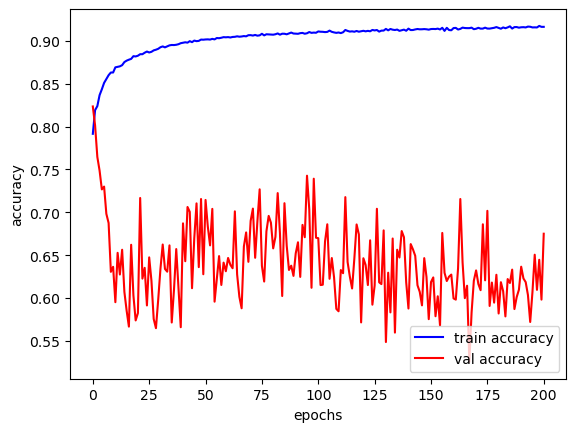

In [15]:

#5: build a model with weight regularization
reg= tf.keras.regularizers.l2(0.1) # L2: 0.01, 0.1, 0.5 
model2 = tf.keras. Sequential()
model2.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=10, activation='softmax'))

##model2.summary()
#5-1: configure the model for training
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#5-2: train and evaluate the model
ret2 = model2. fit (x_train, y_train, epochs=201, batch_size=400,
                    validation_data = (x_test, y_test), verbose=0) 

train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose=2) 
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
#5-3: plot accuracy
# plt.title("With regularization by %s traing data in mnist" %n_sample) 
plt.plot(ret2.history['accuracy'],"b-", label="train accuracy") 
plt.plot(ret2. history['val_accuracy'], "r-", label="val accuracy") 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend (loc="best")
plt.show()

1875/1875 - 5s - loss: 0.9552 - accuracy: 0.7782 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 34.0058 - accuracy: 0.3571 - 911ms/epoch - 3ms/step


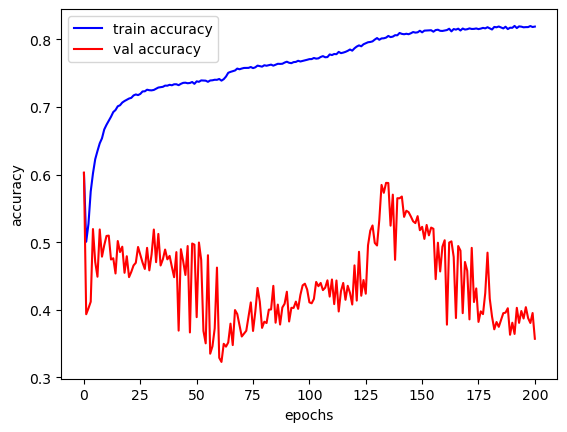

In [16]:

#5: build a model with weight regularization
reg= tf.keras.regularizers.l2(0.5) # L2: 0.01, 0.1, 0.5 
model2 = tf.keras. Sequential()
model2.add(tf.keras.layers. Flatten (input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=n, activation=act, kernel_initializer = init,kernel_regularizer=reg))
model2.add(tf.keras. layers. Dense (units=10, activation='softmax'))

##model2.summary()
#5-1: configure the model for training
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#5-2: train and evaluate the model
ret2 = model2. fit (x_train, y_train, epochs=201, batch_size=400,
                    validation_data = (x_test, y_test), verbose=0) 

train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose=2) 
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
#5-3: plot accuracy
# plt.title("With regularization by %s traing data in mnist" %n_sample) 
plt.plot(ret2.history['accuracy'],"b-", label="train accuracy") 
plt.plot(ret2. history['val_accuracy'], "r-", label="val accuracy") 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend (loc="best")
plt.show()

In [17]:

n = 100
dropout_rate=0.2 # 0.5
model= tf.keras. Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers.Dropout(rate=dropout_rate))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers.Dropout(rate=dropout_rate))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#4-1: configure the model for training
##opt = tf.keras.optimizers. RMS prop (learning_rate=0.01)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=201, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

#4-3: plot accuracies
# plt.title("Dropout rate = %s, %s traing data in mnist" % (dropout_rate, n_sample)) 
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 8961

In [ ]:

n = 100
dropout_rate=0.5 # 0.5
model= tf.keras. Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers.Dropout(rate=dropout_rate))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras.layers.Dropout(rate=dropout_rate))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#4-1: configure the model for training
##opt = tf.keras.optimizers. RMS prop (learning_rate=0.01)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=201, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

#4-3: plot accuracies
# plt.title("Dropout rate = %s, %s traing data in mnist" % (dropout_rate, n_sample)) 
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [ ]:
#4: build a model with dropout
act = tf.keras. layers. LeakyReLU (alpha=0.3) #' relu', 'sigmoid' init
n = 100
'he_uniform'
dropout_rate= 0.2 # 0.5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras. layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras. layers.Dropout(rate=dropout_rate))
model.add(tf.keras. layers.Dense(units=n, activation=act, kernel_initializer = init)) 
model.add(tf.keras. layers.Dropout(rate=dropout_rate))
model.add(tf.keras. layers.Dense(units=10, activation='softmax')) 
model.summary()
#4-1: configure the model for training
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#4-2: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=201, batch_size=400,
                validation_data = (x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
#4-3: plot accuracies
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc= "best") 
plt.show()